In [2]:
from shapely.geometry import Point,Polygon

p1 = Point(24.952242, 60.1696017)
p2 = Point(24.976567, 60.1612500)

coords = [(24.950899, 60.169158), (24.953492, 60.169158), (24.953510, 60.170104), (24.950958, 60.169990)]

poly = Polygon(coords)

print (p1)
print (p2)
print (poly)

POINT (24.952242 60.1696017)
POINT (24.976567 60.16125)
POLYGON ((24.950899 60.169158, 24.953492 60.169158, 24.95351 60.170104, 24.950958 60.16999, 24.950899 60.169158))


In [7]:
p1.within(poly)
#p2.within(poly)
print (poly.centroid)
poly.contains(p1)

POINT (24.95224242849236 60.16960179038188)


True

In [10]:
from shapely.geometry import LineString, MultiLineString

# Create two lines
line_a = LineString([(0, 0), (1, 1)])
line_b = LineString([(1, 1), (0, 2)])

#check for intersection of the ines
line_a.intersects(line_b)
line_a.touches(line_b)


True

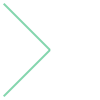

In [13]:
# Create a MultiLineString
multi_line = MultiLineString([line_a, line_b])

multi_line


In [15]:
# Create a MultiLineString
multi_line = MultiLineString([line_a, line_b])

type(multi_line)


shapely.geometry.multilinestring.MultiLineString

In [16]:
 line_a.touches(line_a)

False

In [17]:
line_a.intersects(line_a)

True

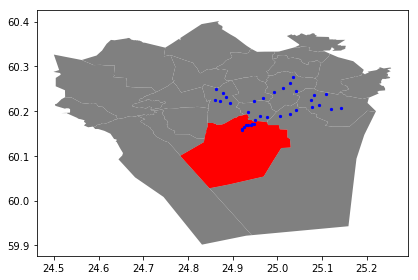

In [24]:
import geopandas as gpd
#reads the shapefie
fp = r"C:\Users\admin\geopython\L3\address\addresses.shp"

data = gpd.read_file(fp)




import matplotlib.pyplot as plt

#makes KML readable and writtable by geopandas using fiona supported drivers
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'

fp = r"C:\Users\admin\geopython\L3\PKS_suuralue.kml"

#reads the KML file into var polys
polys = gpd.read_file(fp, driver="KML")

#check progress
polys.head(5)
polys.describe()


southern = polys.loc[polys['Name']=='Eteläinen']

southern.reset_index(drop=True, inplace=True)

fig, ax = plt.subplots()

polys.plot(ax=ax, facecolor='gray');

southern.plot(ax=ax, facecolor='red');

data.plot(ax=ax, color='blue', markersize=5);

plt.tight_layout();

import shapely.speedups

shapely.speedups.enable()





In [25]:
pip_mask = data.within(southern.loc[0, 'geometry'])

print (pip_mask)

0      True
1      True
2     False
3     False
4      True
5     False
6     False
7     False
8     False
9     False
10     True
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30     True
31     True
32     True
33     True
34    False
dtype: bool


In [26]:
pip_data = data.loc[pip_mask]
pip_data

,address,id,geometry
0,"Kampinkuja 1, 00100 Helsinki, Finland",1001,POINT (24.9301701 60.1683731)
1,"Kaivokatu 8, 00101 Helsinki, Finland",1002,POINT (24.9418933 60.1698665)
4,"Tyynenmerenkatu 9, 00220 Helsinki, Finland",1005,POINT (24.9214846 60.1565781)
10,"Rautatientori 1, 00100 Helsinki, Finland",1011,POINT (24.94251 60.1711874)
30,"Urho Kekkosen katu 1, 00100 Helsinki, Finland",1031,POINT (24.9337569 60.1694809)
31,"Gräsviksgatan 17, 00101 Helsingfors, Finland",1032,POINT (24.9250072 60.16500139999999)
32,"Stillahavsgatan 3, 00220 Helsingfors, Finland",1033,POINT (24.9214046 60.159069)
33,"Vilhelmsgatan 4, 00101 Helsingfors, Finland",1034,POINT (24.9468514 60.1719108)


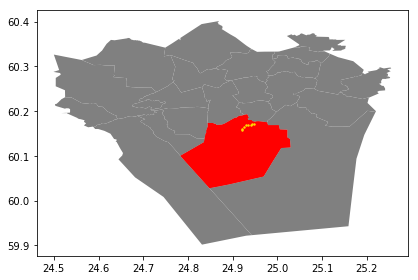

In [27]:
southern = polys.loc[polys['Name']=='Eteläinen']

southern.reset_index(drop=True, inplace=True)

fig, ax = plt.subplots()

polys.plot(ax=ax, facecolor='gray');

southern.plot(ax=ax, facecolor='red');

pip_data.plot(ax=ax, color='gold', markersize=2);

plt.tight_layout();

In [29]:
gfp = r"C:\Users\admin\geopython\L3\pop_grid\Vaestotietoruudukko_2015.shp"

pop = gpd.read_file (gfp)

pop.head()

,INDEX,ASUKKAITA,ASVALJYYS,IKA0_9,IKA10_19,IKA20_29,IKA30_39,IKA40_49,IKA50_59,IKA60_69,IKA70_79,IKA_YLI80,geometry
0,688,8,31.0,99,99,99,99,99,99,99,99,99,"POLYGON ((25472499.99532626 6689749.005069185,..."
1,703,6,42.0,99,99,99,99,99,99,99,99,99,"POLYGON ((25472499.99532626 6685998.998064222,..."
2,710,8,44.0,99,99,99,99,99,99,99,99,99,"POLYGON ((25472499.99532626 6684249.004130407,..."
3,711,7,64.0,99,99,99,99,99,99,99,99,99,"POLYGON ((25472499.99532626 6683999.004997005,..."
4,715,19,23.0,99,99,99,99,99,99,99,99,99,"POLYGON ((25472499.99532626 6682998.998461431,..."


In [30]:
pop = pop.rename(columns={'ASUKKAITA': 'pop15'})

In [31]:
selected_cols = ['pop15', 'geometry']


pop = pop[selected_cols]

pop.tail(2)

,pop15,geometry
5782,9,"POLYGON ((25513499.99632164 6685498.999797418,..."
5783,30244,"POLYGON ((25513999.999929 6659998.998172711, 2..."


In [38]:
pop.crs

{'proj': 'tmerc',
 'lat_0': 0,
 'lon_0': 25,
 'k': 1,
 'x_0': 25500000,
 'y_0': 0,
 'ellps': 'GRS80',
 'units': 'm',
 'no_defs': True}

In [33]:
add_fp = r"C:\Users\admin\geopython\L3\address\addresses.shp"

addresses = gpd.read_file(add_fp)

In [39]:
add = addresses.to_crs(pop.crs)
add.head(5)
add.crs

{'proj': 'tmerc',
 'lat_0': 0,
 'lon_0': 25,
 'k': 1,
 'x_0': 25500000,
 'y_0': 0,
 'ellps': 'GRS80',
 'units': 'm',
 'no_defs': True}

In [40]:
add.crs==pop.crs

True

In [42]:
#joins the population column to the row of point if point is in the polygon. NB geometry of the polygon is not added

join = gpd.sjoin(add, pop, how="inner", op="within")

# Let's check the result
join.head()

,address,id,geometry,index_right,pop15
0,"Kampinkuja 1, 00100 Helsinki, Finland",1001,POINT (25496123.30852197 6672833.941567578),3326,173
1,"Kaivokatu 8, 00101 Helsinki, Finland",1002,POINT (25496774.28242895 6672999.698581985),3449,31
10,"Rautatientori 1, 00100 Helsinki, Finland",1011,POINT (25496808.64582102 6673146.836896984),3449,31
3,"Itäväylä, 00900 Helsinki, Finland",1004,POINT (25505098.34340289 6677972.568484426),5112,353
4,"Tyynenmerenkatu 9, 00220 Helsinki, Finland",1005,POINT (25495639.56049686 6671520.343245601),3259,1397


In [43]:
outfp = r"C:\Users\admin\geopython\L3\address\addresses_pop15_projected.shp"

# Save to disk
join.to_file(outfp)

C:\Users\admin\Miniconda3\envs\geopython-environment\lib\site-packages\pysal\__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://pysal.org/about
  ), VisibleDeprecationWarning)


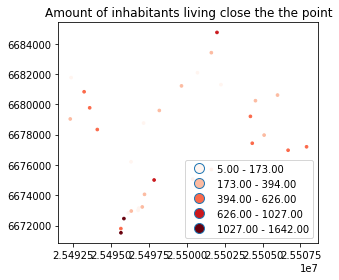

In [44]:
import matplotlib.pyplot as plt

# Plot the points with population info
join.plot(column='pop15', cmap="Reds", markersize=7, scheme='fisher_jenks', legend=True);

# Add title
plt.title("Amount of inhabitants living close the the point");

# Remove white space around the figure
plt.tight_layout()